**Sales Data Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\NGC\Desktop\Python data analysis projects\Project 4\Sales-Data-Analysis.csv")

In [3]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


In [5]:
data.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [7]:
data.columns

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')

**1. ----Data Cleaning----**

In [12]:
data.Manager

0        Tom      Jackson
1             Pablo Perez
2           Joao    Silva
3           Walter Muller
4           Walter Muller
              ...        
249         Walter Muller
250         Walter Muller
251         Walter Muller
252         Walter Muller
253         Walter Muller
Name: Manager, Length: 254, dtype: object

In [13]:
data.Manager.unique()

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [14]:
data.Manager.nunique()

14

**Remove spaces**

In [16]:
data['Manager'].str.strip().str.replace(r'\s+', ' ', regex=True) # extra spaces removed

0        Tom Jackson
1        Pablo Perez
2         Joao Silva
3      Walter Muller
4      Walter Muller
           ...      
249    Walter Muller
250    Walter Muller
251    Walter Muller
252    Walter Muller
253    Walter Muller
Name: Manager, Length: 254, dtype: object

**Change the column with above space removed data**

In [17]:
data['Manager'] = data['Manager'].str.strip().str.replace(r'\s+', ' ', regex=True)

In [18]:
data.head(20)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
5,10457,08-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris
6,10459,08-11-2022,Sides & Other,4.99,200.40,In-store,Credit Card,Walter Muller,Berlin
7,10460,09-11-2022,Burgers,12.99,554.27,In-store,Credit Card,Remy Monet,Paris
8,10461,09-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Remy Monet,Paris
9,10462,09-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris


In [19]:
data.Manager.unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [21]:
data.Manager.nunique()

5

**Remove Duplicate Records**

In [22]:
data.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


In [24]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
249    False
250    False
251    False
252    False
253    False
Length: 254, dtype: bool

In [25]:
data[data.duplicated()]

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City


*No duplicate records*

In [28]:
data['Order ID'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
249    False
250    False
251    False
252    False
253    False
Name: Order ID, Length: 254, dtype: bool

In [29]:
data[data['Order ID'].duplicated()]

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City


*No duplicates in Order ID table*

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


**2. ----Change data types to proper----**

In [39]:
data.Quantity = data.Quantity.astype(int) # Changed Quantity data type Float to INT

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    int64  
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 18.0+ KB


In [40]:
data.Date = pd.to_datetime(data.Date, dayfirst=True) # Changed Date data type object to datetime format

In [36]:
data.Date.dtype

dtype('<M8[ns]')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 18.0+ KB


In [38]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin


**3. ----Most Sold Products----**

**3.1. By Quantity**

In [41]:
data.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin
5,10457,2022-11-08,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris
6,10459,2022-11-08,Sides & Other,4.99,200,In-store,Credit Card,Walter Muller,Berlin
7,10460,2022-11-09,Burgers,12.99,554,In-store,Credit Card,Remy Monet,Paris
8,10461,2022-11-09,Chicken Sandwiches,9.95,201,In-store,Credit Card,Remy Monet,Paris
9,10462,2022-11-09,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris


In [44]:
data.groupby('Product')['Quantity'].sum()

Product
Beverages             34938
Burgers               28996
Chicken Sandwiches    11132
Fries                 32016
Sides & Other          9800
Name: Quantity, dtype: int64

In [45]:
data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

Product
Beverages             34938
Fries                 32016
Burgers               28996
Chicken Sandwiches    11132
Sides & Other          9800
Name: Quantity, dtype: int64

In [65]:
most_quantity = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
most_quantity

Product
Beverages             34938
Fries                 32016
Burgers               28996
Chicken Sandwiches    11132
Sides & Other          9800
Name: Quantity, dtype: int64

In [47]:
type(most_quantity)

pandas.core.series.Series

In [66]:
most_quantity  = most_quantity.reset_index() # put them into data frame
most_quantity

,Product,Quantity
0,Beverages,34938
1,Fries,32016
2,Burgers,28996
3,Chicken Sandwiches,11132
4,Sides & Other,9800


In [67]:
type(most_quantity)

pandas.core.frame.DataFrame

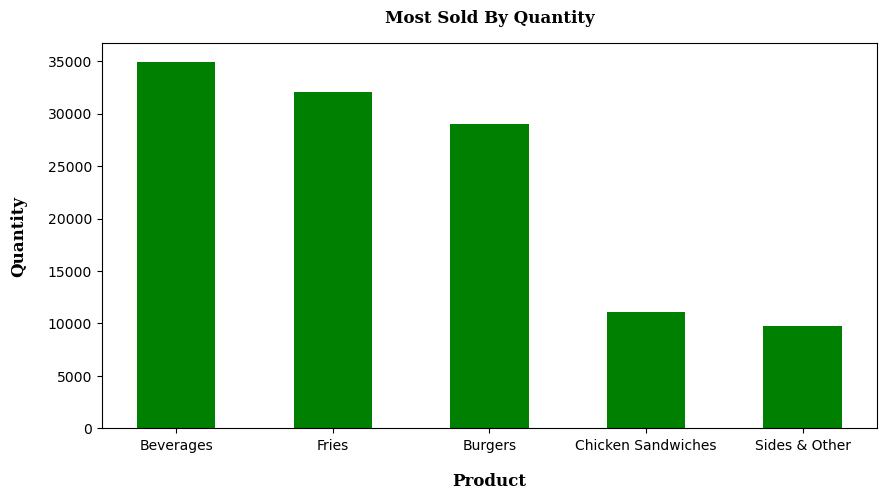

In [86]:
plt.figure(figsize = (10,5))
plt.bar(most_quantity['Product'], most_quantity['Quantity'], color='green', width=0.5) 
plt.title("Most Sold By Quantity", fontweight='bold', fontsize=12, family='serif', pad=15)
plt.xlabel("Product" ,fontweight='bold', fontsize=12, family='serif', labelpad=15)
plt.ylabel("Quantity", fontweight='bold', fontsize=12, family='serif', labelpad=15);

**3.2. By Revenue**

In [87]:
data.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid


In [90]:
data['Revenue'] = data['Price'] * data['Quantity'] # create Revenue column

In [89]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95
...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70


In [92]:
data.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

Product
Burgers               376658.04
Fries                 125602.14
Chicken Sandwiches    114602.50
Beverages             103067.10
Sides & Other          48902.00
Name: Revenue, dtype: float64

In [93]:
most_revenue = data.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
most_revenue

Product
Burgers               376658.04
Fries                 125602.14
Chicken Sandwiches    114602.50
Beverages             103067.10
Sides & Other          48902.00
Name: Revenue, dtype: float64

In [94]:
most_revenue  = most_revenue.reset_index() # put them into data frame
most_revenue

,Product,Revenue
0,Burgers,376658.04
1,Fries,125602.14
2,Chicken Sandwiches,114602.50
3,Beverages,103067.10
4,Sides & Other,48902.00


In [95]:
type(most_revenue)

pandas.core.frame.DataFrame

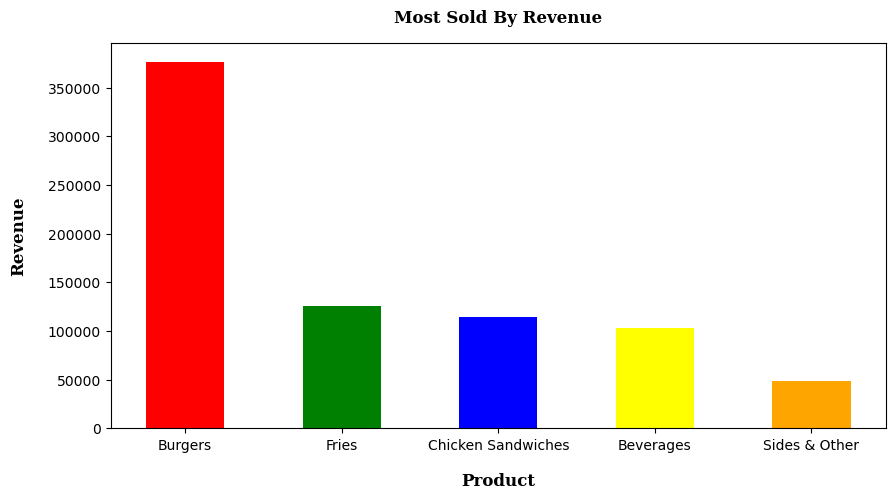

In [97]:
plt.figure(figsize = (10,5))
plt.bar(most_revenue['Product'], most_revenue['Revenue'], color=['red', 'green', 'blue','yellow', 'orange'], width=0.5) 
plt.title("Most Sold By Revenue", fontweight='bold', fontsize=12, family='serif', pad=15)
plt.xlabel("Product" ,fontweight='bold', fontsize=12, family='serif', labelpad=15)
plt.ylabel("Revenue", fontweight='bold', fontsize=12, family='serif', labelpad=15);

**4. ----Most Used Payment Method----**

In [98]:
data.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95
5,10457,2022-11-08,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris,1999.77
6,10459,2022-11-08,Sides & Other,4.99,200,In-store,Credit Card,Walter Muller,Berlin,998.00
7,10460,2022-11-09,Burgers,12.99,554,In-store,Credit Card,Remy Monet,Paris,7196.46
8,10461,2022-11-09,Chicken Sandwiches,9.95,201,In-store,Credit Card,Remy Monet,Paris,1999.95
9,10462,2022-11-09,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris,1999.77


In [102]:
data['Payment Method'].unique() # types of payments

array([' Gift Card', ' Credit Card', ' Cash'], dtype=object)

In [103]:
 data['Payment Method'].nunique() # count of payment types

3

In [104]:
data['Payment Method'].value_counts()

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

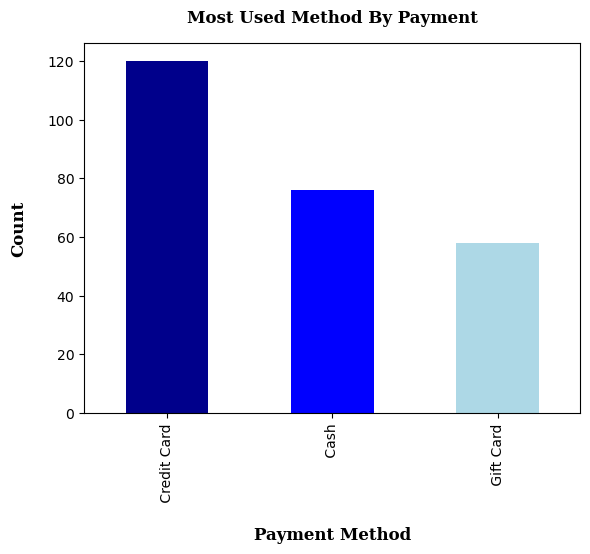

In [118]:
colors = ['#00008B', '#0000FF', '#ADD8E6']
data['Payment Method'].value_counts().plot(kind='bar', color = colors)
plt.xlabel("Payment Method", fontweight='bold', fontsize=12, family='serif', labelpad=15)
plt.ylabel("Count", fontweight='bold', fontsize=12, family='serif', labelpad=15)
plt.title("Most Used Method By Payment", fontweight='bold', fontsize=12, family='serif', pad=15);

**5. ----Most Used Purchase Type----**

In [112]:
data.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95
5,10457,2022-11-08,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris,1999.77
6,10459,2022-11-08,Sides & Other,4.99,200,In-store,Credit Card,Walter Muller,Berlin,998.00
7,10460,2022-11-09,Burgers,12.99,554,In-store,Credit Card,Remy Monet,Paris,7196.46
8,10461,2022-11-09,Chicken Sandwiches,9.95,201,In-store,Credit Card,Remy Monet,Paris,1999.95
9,10462,2022-11-09,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris,1999.77


In [114]:
data['Purchase Type'].unique() # find Purchase Types

array(['Online ', 'In-store ', 'Drive-thru '], dtype=object)

In [115]:
data['Purchase Type'].nunique() # count of Purchase Types

3

In [117]:
data['Purchase Type'].value_counts() # sum of values for each type

Purchase Type
Online         107
In-store        86
Drive-thru      61
Name: count, dtype: int64

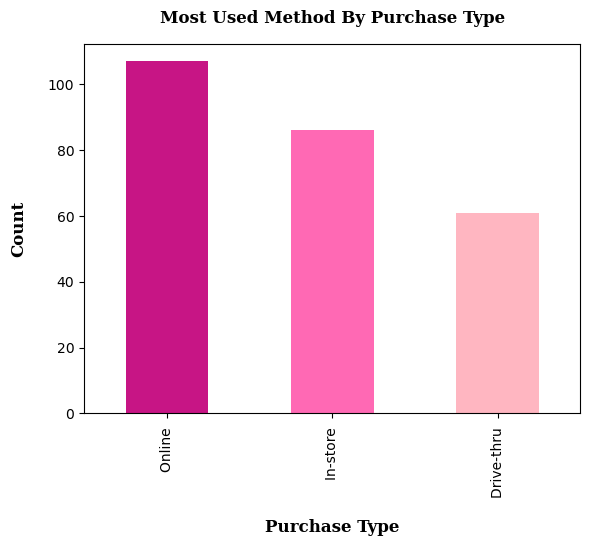

In [119]:
colors = ['#C71585', '#FF69B4', '#FFB6C1']
data['Purchase Type'].value_counts().plot(kind='bar', color = colors)
plt.xlabel("Purchase Type", fontweight='bold', fontsize=12, family='serif', labelpad=15)
plt.ylabel("Count", fontweight='bold', fontsize=12, family='serif', labelpad=15)
plt.title("Most Used Method By Purchase Type", fontweight='bold', fontsize=12, family='serif', pad=15);

**6. ----Most Revenue By City----**

In [120]:
data.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95
5,10457,2022-11-08,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris,1999.77
6,10459,2022-11-08,Sides & Other,4.99,200,In-store,Credit Card,Walter Muller,Berlin,998.00
7,10460,2022-11-09,Burgers,12.99,554,In-store,Credit Card,Remy Monet,Paris,7196.46
8,10461,2022-11-09,Chicken Sandwiches,9.95,201,In-store,Credit Card,Remy Monet,Paris,1999.95
9,10462,2022-11-09,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris,1999.77


In [121]:
data.City.unique()

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

In [122]:
data.City.nunique()

5

In [124]:
data.groupby('City')['Revenue'].sum().sort_values(ascending=False)

City
Lisbon    241509.38
London    211001.83
Madrid    136098.22
Berlin    100492.73
Paris      79729.62
Name: Revenue, dtype: float64

In [130]:
most_revenueCity = data.groupby('City')['Revenue'].sum().sort_values(ascending=False)
most_revenueCity

City
Lisbon    241509.38
London    211001.83
Madrid    136098.22
Berlin    100492.73
Paris      79729.62
Name: Revenue, dtype: float64

In [131]:
type(most_revenueCity)

pandas.core.series.Series

In [132]:
most_revenueCity  = most_revenueCity.reset_index() # put them into data frame
most_revenueCity

,City,Revenue
0,Lisbon,241509.38
1,London,211001.83
2,Madrid,136098.22
3,Berlin,100492.73
4,Paris,79729.62


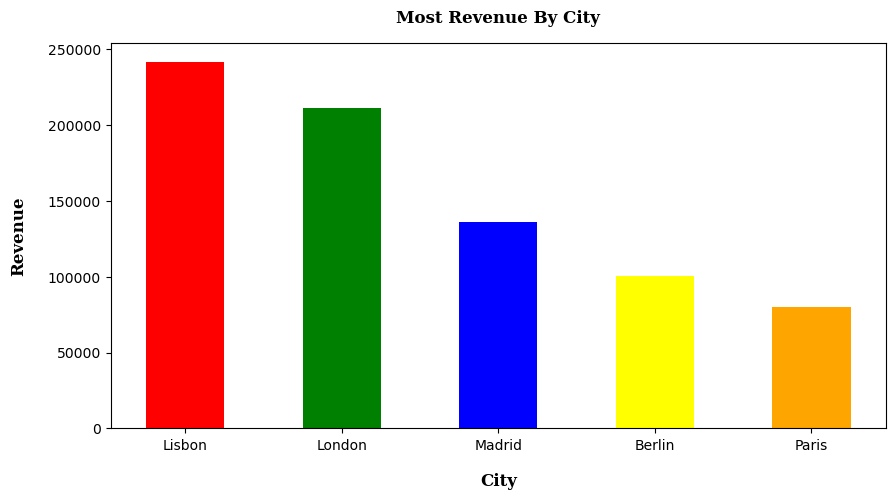

In [133]:
plt.figure(figsize = (10,5))
plt.bar(most_revenueCity['City'], most_revenueCity['Revenue'], color=['red', 'green', 'blue','yellow', 'orange'], width=0.5) 
plt.title("Most Revenue By City", fontweight='bold', fontsize=12, family='serif', pad=15)
plt.xlabel("City" ,fontweight='bold', fontsize=12, family='serif', labelpad=15)
plt.ylabel("Revenue", fontweight='bold', fontsize=12, family='serif', labelpad=15);

**7. ----Most Revenue By Manager----**

In [125]:
data.Manager.unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [126]:
data.Manager.nunique()

5

In [128]:
data.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)

Manager
Joao Silva       241509.38
Tom Jackson      211001.83
Pablo Perez      136098.22
Walter Muller    100492.73
Remy Monet        79729.62
Name: Revenue, dtype: float64

In [134]:
most_revenueManger = data.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)
most_revenueManger

Manager
Joao Silva       241509.38
Tom Jackson      211001.83
Pablo Perez      136098.22
Walter Muller    100492.73
Remy Monet        79729.62
Name: Revenue, dtype: float64

In [135]:
most_revenueManger = most_revenueManger.reset_index()
most_revenueManger

,Manager,Revenue
0,Joao Silva,241509.38
1,Tom Jackson,211001.83
2,Pablo Perez,136098.22
3,Walter Muller,100492.73
4,Remy Monet,79729.62


In [136]:
type(most_revenueManger)# put them into data frame

pandas.core.frame.DataFrame

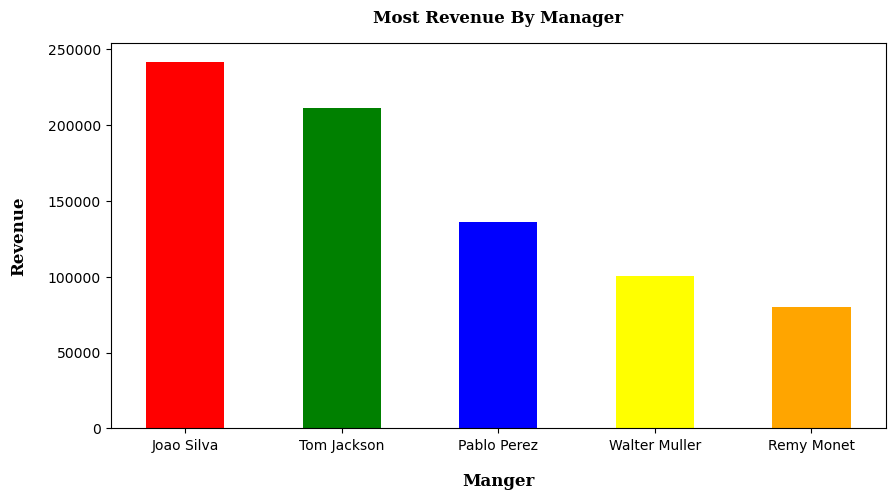

In [137]:
plt.figure(figsize = (10,5))
plt.bar(most_revenueManger['Manager'], most_revenueManger['Revenue'], color=['red', 'green', 'blue','yellow', 'orange'], width=0.5) 
plt.title("Most Revenue By Manager", fontweight='bold', fontsize=12, family='serif', pad=15)
plt.xlabel("Manger" ,fontweight='bold', fontsize=12, family='serif', labelpad=15)
plt.ylabel("Revenue", fontweight='bold', fontsize=12, family='serif', labelpad=15);

**After considering above "Most Revenue By City" and "Most Revenue By City" could able to find that both "City Revenue" and "Manager Revenue" are same**

**8. ----Revenue By Date wise----**

In [138]:
data.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95
5,10457,2022-11-08,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris,1999.77
6,10459,2022-11-08,Sides & Other,4.99,200,In-store,Credit Card,Walter Muller,Berlin,998.00
7,10460,2022-11-09,Burgers,12.99,554,In-store,Credit Card,Remy Monet,Paris,7196.46
8,10461,2022-11-09,Chicken Sandwiches,9.95,201,In-store,Credit Card,Remy Monet,Paris,1999.95
9,10462,2022-11-09,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris,1999.77


In [140]:
data.Date.dtype # check the data type of date column

dtype('<M8[ns]')

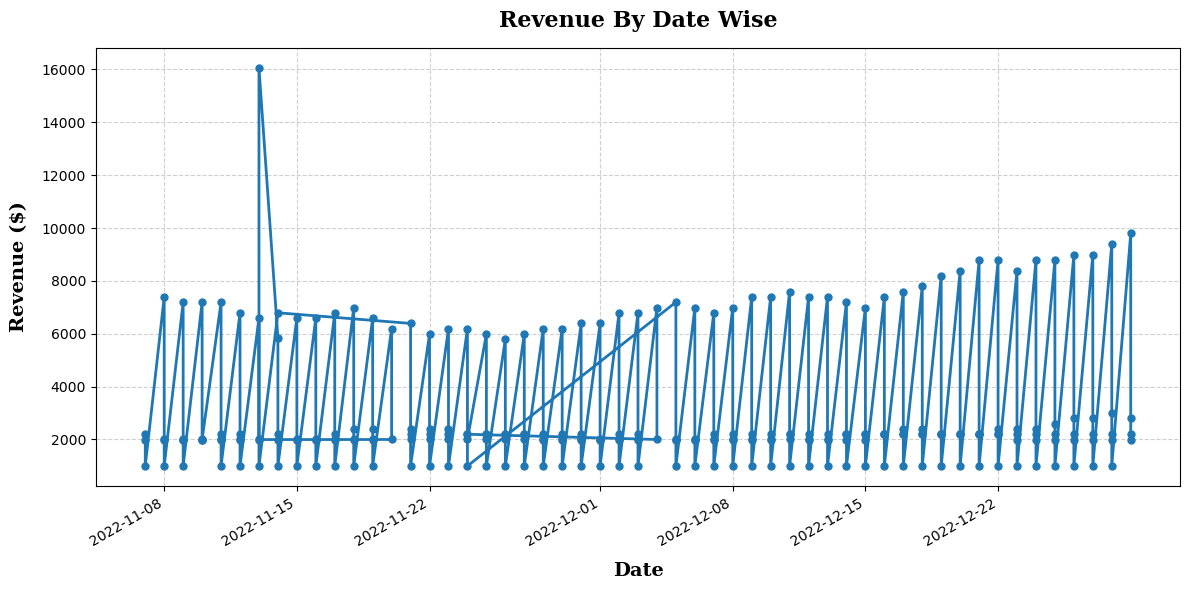

In [146]:
plt.figure(figsize=(12, 6))  
plt.plot(data['Date'], data['Revenue'], marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=5)
plt.title('Revenue By Date Wise', fontsize=16, fontweight='bold', family='serif', pad=15)
plt.xlabel('Date', fontsize=14, fontweight='bold', family='serif', labelpad=10)
plt.ylabel('Revenue ($)', fontsize=14, fontweight='bold', family='serif', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gcf().autofmt_xdate() 
plt.tight_layout()

**9. ----Average Revenue----**

In [147]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95


In [148]:
data['Revenue'].mean()

np.float64(3026.8967716535435)

**9.1. Average Revenue of November and December (data available only for these months)**

In [149]:
data['Date'].dt.month

0      11
1      11
2      11
3      11
4      11
       ..
249    12
250    12
251    12
252    12
253    12
Name: Date, Length: 254, dtype: int32

In [150]:
data['Month'] = data['Date'].dt.month

In [151]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [153]:
data[data['Month'] == 11]

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
108,10568,2022-11-30,Beverages,2.95,677,Online,Credit Card,Tom Jackson,London,1997.15,11
109,10569,2022-11-30,Sides & Other,4.99,200,Online,Credit Card,Tom Jackson,London,998.00,11
127,10537,2022-11-24,Fries,3.49,630,Drive-thru,Credit Card,Pablo Perez,Madrid,2198.70,11
128,10538,2022-11-24,Beverages,2.95,745,Drive-thru,Credit Card,Pablo Perez,Madrid,2197.75,11


In [154]:
November = data[data['Month'] == 11]
November

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
108,10568,2022-11-30,Beverages,2.95,677,Online,Credit Card,Tom Jackson,London,1997.15,11
109,10569,2022-11-30,Sides & Other,4.99,200,Online,Credit Card,Tom Jackson,London,998.00,11
127,10537,2022-11-24,Fries,3.49,630,Drive-thru,Credit Card,Pablo Perez,Madrid,2198.70,11
128,10538,2022-11-24,Beverages,2.95,745,Drive-thru,Credit Card,Pablo Perez,Madrid,2197.75,11


In [156]:
November.Revenue.mean() # Average Revenue of November

np.float64(2936.6534513274337)

In [157]:
data[data['Month'] == 12]

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
110,10570,2022-12-01,Burgers,12.99,492,Online,Credit Card,Tom Jackson,London,6391.08,12
111,10571,2022-12-01,Chicken Sandwiches,9.95,201,Online,Credit Card,Tom Jackson,London,1999.95,12
112,10572,2022-12-01,Fries,3.49,573,Online,Credit Card,Remy Monet,Paris,1999.77,12
113,10573,2022-12-01,Beverages,2.95,677,Online,Credit Card,Remy Monet,Paris,1997.15,12
114,10574,2022-12-01,Sides & Other,4.99,200,Online,Credit Card,Remy Monet,Paris,998.00,12
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [158]:
December = data[data['Month'] == 12]
December

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
110,10570,2022-12-01,Burgers,12.99,492,Online,Credit Card,Tom Jackson,London,6391.08,12
111,10571,2022-12-01,Chicken Sandwiches,9.95,201,Online,Credit Card,Tom Jackson,London,1999.95,12
112,10572,2022-12-01,Fries,3.49,573,Online,Credit Card,Remy Monet,Paris,1999.77,12
113,10573,2022-12-01,Beverages,2.95,677,Online,Credit Card,Remy Monet,Paris,1997.15,12
114,10574,2022-12-01,Sides & Other,4.99,200,Online,Credit Card,Remy Monet,Paris,998.00,12
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [187]:
December.Revenue.mean() #Average Revenue of December

np.float64(3099.2194326241133)

**10. -----Standard deviationa of Revenue and Quantity----**

**10.1. SD of Revenue**

In [162]:
data['Revenue'].std()

2418.1931282105456

**10.2. SD of Quantity**

In [163]:
data['Quantity'].std()

214.69197583196447

**11. -----Variance of Revenue and Quantity----**

**11.1. Variance of Revenue**

In [165]:
data['Revenue'].var()

5847658.005324705

**11.2. Variance of Quantity**

In [167]:
data['Quantity'].var()

46092.64448663282

**12 -----Has Revenue increased or decreased?----**

In [168]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11


In [169]:
November = data[data['Month'] == 11]
November

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
108,10568,2022-11-30,Beverages,2.95,677,Online,Credit Card,Tom Jackson,London,1997.15,11
109,10569,2022-11-30,Sides & Other,4.99,200,Online,Credit Card,Tom Jackson,London,998.00,11
127,10537,2022-11-24,Fries,3.49,630,Drive-thru,Credit Card,Pablo Perez,Madrid,2198.70,11
128,10538,2022-11-24,Beverages,2.95,745,Drive-thru,Credit Card,Pablo Perez,Madrid,2197.75,11


In [171]:
November['Revenue'].sum() # total revenue for november

np.float64(331841.84)

In [172]:
December = data[data['Month'] == 12]
December

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
110,10570,2022-12-01,Burgers,12.99,492,Online,Credit Card,Tom Jackson,London,6391.08,12
111,10571,2022-12-01,Chicken Sandwiches,9.95,201,Online,Credit Card,Tom Jackson,London,1999.95,12
112,10572,2022-12-01,Fries,3.49,573,Online,Credit Card,Remy Monet,Paris,1999.77,12
113,10573,2022-12-01,Beverages,2.95,677,Online,Credit Card,Remy Monet,Paris,1997.15,12
114,10574,2022-12-01,Sides & Other,4.99,200,Online,Credit Card,Remy Monet,Paris,998.00,12
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [173]:
December['Revenue'].sum()

np.float64(436989.94)

**After considering above "Revenue of November" and "Revenue of December" could able to find that "Revenue has clearly Increased!!"**

**13. ----Average Quantity Sold and Average Revenue for each product----**

In [177]:
 data.groupby('Product')[['Quantity', 'Revenue']].agg({'Quantity':'mean', 'Revenue':'mean'}) # mean = Average

,Quantity,Revenue
Product,,
Beverages,698.760000,2061.342000
Burgers,557.615385,7243.423846
Chicken Sandwiches,214.076923,2203.894231
Fries,627.764706,2462.787059
Sides & Other,200.000000,998.000000


**11. ----Maximum and Minimum Revenue Of November and December----**

**11.1. Maximum and Minimum Revenue of November**

In [178]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11


In [179]:
November = data[data['Month'] == 11]
November

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
108,10568,2022-11-30,Beverages,2.95,677,Online,Credit Card,Tom Jackson,London,1997.15,11
109,10569,2022-11-30,Sides & Other,4.99,200,Online,Credit Card,Tom Jackson,London,998.00,11
127,10537,2022-11-24,Fries,3.49,630,Drive-thru,Credit Card,Pablo Perez,Madrid,2198.70,11
128,10538,2022-11-24,Beverages,2.95,745,Drive-thru,Credit Card,Pablo Perez,Madrid,2197.75,11


In [192]:
November['Revenue'].max() # maximum Revenue for November

16065.0

In [196]:
November['Revenue'].min() # minimum Revenue for November

998.0

**11.2. Maximum and Minimum Revenue of December**

In [198]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11


In [199]:
December = data[data['Month'] == 12]
December

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
110,10570,2022-12-01,Burgers,12.99,492,Online,Credit Card,Tom Jackson,London,6391.08,12
111,10571,2022-12-01,Chicken Sandwiches,9.95,201,Online,Credit Card,Tom Jackson,London,1999.95,12
112,10572,2022-12-01,Fries,3.49,573,Online,Credit Card,Remy Monet,Paris,1999.77,12
113,10573,2022-12-01,Beverages,2.95,677,Online,Credit Card,Remy Monet,Paris,1997.15,12
114,10574,2022-12-01,Sides & Other,4.99,200,Online,Credit Card,Remy Monet,Paris,998.00,12
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [201]:
December['Revenue'].max() # maximum Revenue for December

9794.460000000001

In [202]:
December['Revenue'].min() # minimum Revenue for December

998.0